In [1320]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, Lasso, \
LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, silhouette_score, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import f_classif

In [1321]:
twenty_stats = pd.read_csv('./datasets/twenty_STATS.csv')
nineteen_stats = pd.read_csv('./datasets/nineteen_STATS.csv')
eighteen_stats =  pd.read_csv('./datasets/eighteen_STATS.csv')
seventeen_stats = pd.read_csv('./datasets/seventeen_STATS.csv')
sixteen_stats = pd.read_csv('./datasets/sixteen_STATS.csv')
fifteen_stats = pd.read_csv('./datasets/fifteen_STATS.csv')
fourteen_stats = pd.read_csv('./datasets/fourteen_STATS.csv')
thirteen_stats = pd.read_csv('./datasets/thirteen_STATS.csv')
twelve_stats = pd.read_csv('./datasets/twelve_STATS.csv')
eleven_stats = pd.read_csv('./datasets/eleven_STATS.csv')


eleven_salary = pd.read_csv('./datasets/eleven_salary.csv')
twelve_salary = pd.read_csv('./datasets/twelve_salary.csv')
thirtheen_salary = pd.read_csv('./datasets/thirtheen_salary.csv')
fourteen_salary = pd.read_csv('./datasets/fourteen_salary.csv')
fifteen_salary = pd.read_csv('./datasets/fifteen_salary.csv')
sixteen_salary = pd.read_csv('./datasets/sixteen_salary.csv')
seventeen_salary = pd.read_csv('./datasets/seventeen_salary.csv')
eighteen_salary = pd.read_csv('./datasets/eighteen_salary.csv')
twenty_salary = pd.read_csv('./datasets/twenty_salary_cond.csv')


twenty_stats_and_sal = pd.read_csv('./datasets/twenty_stats_and_sal.csv')
sixteen_to_twenty_with_sal = pd.read_csv('./datasets/sixteen_to_twenty_with_sal.csv')
seventeen_to_twenty_with_sal = pd.read_csv('./datasets/seventeen_to_twenty_with_sal.csv')
eleven_to_fifteen_with_sal = pd.read_csv('./datasets/eleven_to_fifteen_with_sal.csv')
twelve_to_sixteen_with_sal = pd.read_csv('./datasets/twelve_to_sixteen_with_sal.csv')
thirteen_to_seventeen_with_sal = pd.read_csv('./datasets/thirteen_to_seventeen_with_sal.csv')
fourteen_to_eighteen_with_sal = pd.read_csv('./datasets/fourteen_to_eighteen_with_sal.csv')


In [1322]:
logreg = LogisticRegression(max_iter=100000)
knnc = KNeighborsClassifier()
dt = DecisionTreeClassifier()
bc = BaggingClassifier()
rf = RandomForestClassifier()
svc = SVC()
et = ExtraTreesClassifier()
nb = MultinomialNB()

# First Classification Model(s)

# Sixteen to Twenty with Sal

In [1323]:
sixteen_to_twenty_with_sal.corr()['2019-20'].sort_values(ascending=False)

2019-20    1.000000
PTS        0.777871
FG         0.767685
FGA        0.747993
MP         0.738304
FT         0.706744
GS         0.697379
FTA        0.696733
2PA        0.684865
TOV        0.677175
2P         0.676427
AST        0.567211
STL        0.554729
DRB        0.544989
TRB        0.466665
3PA        0.428419
3P         0.423755
PF         0.376320
G          0.323772
BLK        0.271867
FT%        0.246529
ORB        0.224346
3P%        0.157425
2P%        0.134902
eFG%       0.133224
FG%        0.128468
Rk        -0.018450
Age       -0.048687
Name: 2019-20, dtype: float64

In [1324]:
fourteen_to_eighteen_with_sal.corr()['salary'].sort_values(ascending=False)

salary    1.000000
FG        0.617357
PTS       0.615628
MP        0.615202
2P        0.587224
FTA       0.585406
GS        0.585200
FT        0.568590
2PA       0.550413
DRB       0.549983
FGA       0.547012
TRB       0.518104
TOV       0.465958
PF        0.447768
STL       0.419682
BLK       0.406129
ORB       0.380921
G         0.369519
FG%       0.344509
AST       0.328249
2P%       0.284784
eFG%      0.272467
3P        0.150277
3PA       0.129058
FT%      -0.032867
3P%      -0.040347
Rk       -0.137340
Age      -0.144360
Name: salary, dtype: float64

In [1325]:
thirteen_to_seventeen_with_sal.corr()['salary'].sort_values(ascending=False)

salary    1.000000
FG        0.708810
PTS       0.699907
2P        0.681661
MP        0.680771
FTA       0.671796
2PA       0.652838
FT        0.649479
FGA       0.648293
GS        0.645105
DRB       0.601488
TRB       0.553681
TOV       0.516202
STL       0.429546
ORB       0.376394
BLK       0.370468
PF        0.349152
AST       0.322106
G         0.316028
FG%       0.301223
2P%       0.246688
eFG%      0.242879
3P        0.159262
3PA       0.154435
FT%       0.034787
3P%      -0.052526
Rk       -0.090905
Age      -0.112251
Name: salary, dtype: float64

In [1326]:
u = sixteen_to_twenty_with_sal.describe(percentiles=[0.2,0.4,0.6,0.8])
u
#assigning classes based on quartiles: 20%, 40%, 60%, 80%

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2019-20
count,212.000000,212.000000,212.000000,212.00000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,2.120000e+02
mean,261.674528,27.090566,62.142453,37.05566,24.973302,4.265000,9.264245,0.460356,1.114151,3.096038,...,1.074434,3.594528,4.664811,2.535472,0.819717,0.510849,1.445943,2.027830,11.599717,1.286460e+07
std,151.696450,3.559448,11.309950,23.08560,6.366613,1.974486,4.185321,0.060940,0.792928,2.073500,...,0.823630,1.753289,2.445914,1.857344,0.376633,0.431623,0.747863,0.543607,5.621677,1.018687e+07
min,1.000000,21.000000,16.200000,0.40000,7.720000,0.720000,2.040000,0.320400,0.000000,0.000000,...,0.160000,1.040000,1.180000,0.340000,0.100000,0.020000,0.260000,0.800000,1.920000,1.962880e+05
20%,115.400000,24.000000,54.240000,12.80000,19.208000,2.540000,5.648000,0.411560,0.340000,1.004000,...,0.440000,2.164000,2.724000,1.064000,0.500000,0.200000,0.860000,1.560000,6.860000,2.564753e+06
40%,205.600000,26.000000,60.880000,27.64000,22.936000,3.388000,7.388000,0.437200,0.880000,2.476000,...,0.660000,2.740000,3.556000,1.540000,0.680000,0.320000,1.100000,1.868000,9.084000,8.000000e+06
50%,258.000000,27.000000,63.400000,33.20000,25.190000,3.820000,8.230000,0.448200,1.060000,3.000000,...,0.780000,3.200000,4.070000,1.880000,0.760000,0.380000,1.250000,2.010000,10.040000,1.070500e+07
60%,302.600000,28.000000,66.800000,45.88000,27.340000,4.400000,9.640000,0.460600,1.300000,3.532000,...,0.980000,3.560000,4.752000,2.400000,0.840000,0.440000,1.480000,2.152000,11.792000,1.315527e+07
80%,419.600000,30.000000,71.960000,62.00000,30.972000,5.872000,13.072000,0.496400,1.720000,4.720000,...,1.640000,4.532000,6.284000,3.908000,1.080000,0.736000,2.000000,2.516000,16.268000,2.314040e+07
max,527.000000,41.000000,79.800000,76.20000,36.640000,9.960000,21.180000,0.673800,4.180000,10.580000,...,4.820000,10.260000,15.080000,9.760000,1.880000,2.460000,4.840000,3.360000,31.780000,4.023176e+07


In [1327]:
u1 = thirteen_to_seventeen_with_sal.describe(percentiles=[0.2,0.4,0.6,0.8])
u1
#assigning classes based on quartiles: 20%, 40%, 60%, 80%

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02
mean,233.180412,26.619845,66.086340,38.056701,25.218814,4.114175,9.027577,0.455613,0.819459,2.293041,...,1.101289,3.359149,4.456572,2.435052,0.816108,0.504253,1.462629,2.014820,10.963402,9.642214e+06
std,139.588119,3.516358,11.030749,25.251699,6.904900,1.814532,3.853526,0.051734,0.703791,1.814076,...,0.838901,1.665789,2.374173,1.898676,0.412548,0.470907,0.709042,0.518963,4.962065,6.820829e+06
min,1.000000,19.250000,29.750000,0.000000,9.750000,1.000000,2.325000,0.339500,0.000000,0.000000,...,0.125000,1.025000,1.275000,0.225000,0.150000,0.000000,0.200000,0.625000,2.800000,5.767200e+04
20%,90.600000,23.500000,58.550000,10.500000,18.290000,2.580000,5.565000,0.416650,0.090000,0.315000,...,0.375000,2.050000,2.470000,0.950000,0.475000,0.175000,0.850000,1.575000,6.540000,3.566169e+06
40%,187.400000,25.500000,65.250000,27.800000,23.505000,3.280000,7.415000,0.434750,0.575000,1.750000,...,0.650000,2.630000,3.455000,1.450000,0.650000,0.275000,1.135000,1.925000,8.750000,6.336418e+06
50%,228.500000,26.500000,68.375000,38.875000,25.750000,3.625000,8.187500,0.445125,0.725000,2.087500,...,0.800000,3.000000,3.825000,1.850000,0.750000,0.350000,1.325000,2.012500,9.850000,8.023250e+06
60%,267.800000,27.500000,71.200000,48.600000,27.900000,4.230000,9.615000,0.454350,0.945000,2.735000,...,1.070000,3.275000,4.315000,2.345000,0.850000,0.425000,1.500000,2.125000,11.490000,1.044829e+07
80%,386.000000,29.500000,75.750000,64.600000,32.495000,5.785000,12.610000,0.498700,1.425000,3.860000,...,1.720000,4.520000,6.285000,3.480000,1.100000,0.675000,2.070000,2.385000,15.620000,1.596649e+07
max,476.000000,37.500000,82.000000,81.250000,36.825000,9.700000,20.475000,0.683000,3.875000,8.725000,...,3.725000,8.975000,12.400000,10.150000,2.225000,2.500000,3.675000,3.775000,26.125000,3.096345e+07


In [1328]:
u2 = fourteen_to_eighteen_with_sal.describe(percentiles=[0.2,0.4,0.6,0.8])
u2
#assigning classes based on quartiles: 20%, 40%, 60%, 80%

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salary
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,229.217143,26.074286,64.927619,38.200000,25.281333,4.094667,9.058857,0.450552,0.903238,2.504190,...,1.065905,3.391238,4.454476,2.436952,0.833905,0.500000,1.461143,2.020762,11.019238,1.142361e+07
std,133.559831,3.607172,13.050001,26.115179,6.988884,1.879355,4.037398,0.056156,0.721683,1.851711,...,0.851900,1.752061,2.486565,1.902443,0.413215,0.487336,0.735985,0.542963,5.117107,7.995105e+06
min,3.000000,20.000000,16.000000,0.333333,8.733333,0.933333,2.433333,0.262667,0.000000,0.000000,...,0.066667,0.833333,0.933333,0.200000,0.133333,0.000000,0.233333,0.633333,2.633333,5.767200e+04
20%,100.800000,23.000000,55.333333,10.600000,18.626667,2.366667,5.373333,0.411400,0.166667,0.500000,...,0.400000,1.860000,2.420000,0.986667,0.500000,0.166667,0.833333,1.533333,6.386667,3.980780e+06
40%,177.200000,24.600000,64.200000,25.733333,22.680000,3.206667,7.186667,0.430733,0.633333,1.966667,...,0.633333,2.540000,3.286667,1.433333,0.686667,0.253333,1.186667,1.900000,8.400000,7.536000e+06
50%,225.000000,26.000000,68.333333,36.666667,26.066667,3.566667,7.966667,0.438000,0.833333,2.466667,...,0.733333,3.033333,3.800000,1.766667,0.766667,0.333333,1.333333,2.033333,9.966667,1.000000e+07
60%,264.400000,26.000000,71.000000,50.133333,28.380000,4.233333,9.700000,0.449333,1.033333,2.946667,...,0.946667,3.446667,4.273333,2.293333,0.846667,0.400000,1.466667,2.146667,11.453333,1.258252e+07
80%,372.200000,29.000000,76.333333,66.333333,32.293333,5.866667,13.233333,0.482267,1.506667,4.033333,...,1.673333,4.520000,6.293333,3.566667,1.106667,0.766667,2.000000,2.440000,15.906667,1.854850e+07
max,476.000000,38.000000,82.000000,81.000000,38.100000,8.933333,19.900000,0.696333,4.000000,9.066667,...,4.100000,9.966667,14.133333,10.300000,2.166667,2.566667,3.866667,3.833333,25.966667,3.745715e+07


In [1329]:
sixteen_to_twenty_with_sal['sal_classified'] = ""

In [1330]:
for index, i in enumerate(sixteen_to_twenty_with_sal['2019-20']):
    if i < 2564753:
        sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 1
    elif i < 8000000 and i >= 2564753:
           sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 2
    elif i < 13155269 and i >= 8000000:
           sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 3
    elif i < 23140395 and i >= 13155269:
           sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 4
    else:
        sixteen_to_twenty_with_sal.loc[index, 'sal_classified'] = 5

#Function for the rest of the dataframes will in this format

In [1331]:
# for index, i in enumerate(twelve_to_sixteen_with_sal['salary']):
#     if i < 2564753:
#         twelve_to_sixteen_with_sal.loc[index, 'sal_classified'] = 1
#     elif i < 8000000 and i >= 2564753:
#            twelve_to_sixteen_with_sal.loc[index, 'sal_classified'] = 2
#     elif i < 13155269 and i >= 8000000:
#            twelve_to_sixteen_with_sal.loc[index, 'sal_classified'] = 3
#     elif i < 23140395 and i >= 13155269:
#            twelve_to_sixteen_with_sal.loc[index, 'sal_classified'] = 4
#     else:
#         twelve_to_sixteen_with_sal.loc[index, 'sal_classified'] = 5

In [1332]:
# for index, i in enumerate(eleven_to_fifteen_with_sal['salary']):
#     if i < 2564753:
#         eleven_to_fifteen_with_sal.loc[index, 'sal_classified'] = 1
#     elif i < 8000000 and i >= 2564753:
#            eleven_to_fifteen_with_sal.loc[index, 'sal_classified'] = 2
#     elif i < 13155269 and i >= 8000000:
#            eleven_to_fifteen_with_sal.loc[index, 'sal_classified'] = 3
#     elif i < 23140395 and i >= 13155269:
#            eleven_to_fifteen_with_sal.loc[index, 'sal_classified'] = 4
#     else:
#         eleven_to_fifteen_with_sal.loc[index, 'sal_classified'] = 5

In [1333]:
for index, i in enumerate(thirteen_to_seventeen_with_sal['salary']):
    if i < 3559779:
        thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 1
    elif i < 6345674 and i >= 3559779:
           thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 2
    elif i < 10383156 and i >= 6345674:
           thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 3
    elif i < 15858628 and i >= 10383156:
           thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 4
    else:
        thirteen_to_seventeen_with_sal.loc[index, 'sal_classified'] = 5

In [1334]:
for index, i in enumerate(fourteen_to_eighteen_with_sal['salary']):
    if i < 4112559:
        fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 1
    elif i < 7512000 and i >= 4112559:
           fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 2
    elif i < 12513397 and i >= 7512000:
           fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 3
    elif i < 18512000 and i >= 12513397:
           fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 4
    else:
        fourteen_to_eighteen_with_sal.loc[index, 'sal_classified'] = 5

Working primarily with these three years for now, may incorporate others later

In [1335]:
sixteen_to_twenty_with_sal['sal_classified'] = sixteen_to_twenty_with_sal['sal_classified'].astype(int)

In [1336]:
sixteen_to_twenty_with_sal['sal_classified'].value_counts()

2    47
5    43
3    43
4    42
1    37
Name: sal_classified, dtype: int64

In [1337]:
thirteen_to_seventeen_with_sal['sal_classified'].value_counts()

5.0    40
2.0    39
1.0    39
4.0    38
3.0    38
Name: sal_classified, dtype: int64

In [1338]:
fourteen_to_eighteen_with_sal['sal_classified'].value_counts()

1.0    36
4.0    36
5.0    36
2.0    34
3.0    33
Name: sal_classified, dtype: int64

In [1339]:
sixteen_to_twenty_with_sal.head()

,Player,Rk,Season,Pos,Age,Tm,G,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2019-20,sal_classified
0,Aaron Gordon,178.0,19-20,PF,22.0,ORL,71.2,61.2,30.36,5.26,...,5.22,6.92,2.64,0.82,0.66,1.48,2.06,13.98,19863636,4
1,Al Horford,228.0,19-20,C,31.0,PHI,71.4,70.2,31.04,5.54,...,5.42,7.00,4.22,0.78,1.22,1.50,1.98,13.52,28000000,5
2,Al-Farouq Aminu,9.0,19-20,PF,27.0,ORL,62.2,51.4,27.40,2.90,...,5.36,6.68,1.40,0.96,0.54,1.18,1.82,8.38,9258000,3
3,Alec Burks,80.0,19-20,SG,26.0,TOT,53.4,9.4,21.16,3.48,...,2.98,3.48,1.72,0.62,0.18,1.14,1.60,10.30,2320044,1
4,Alex Len,293.0,19-20,C,24.0,TOT,71.2,27.2,20.30,3.38,...,4.48,6.60,1.00,0.44,0.96,1.32,2.64,8.92,4160000,2


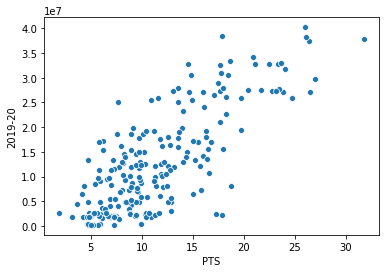

In [1343]:
sns.scatterplot(data=sixteen_to_twenty_with_sal, x='PTS', y='2019-20')
#Players with higher point per game output typically earn a higher salary

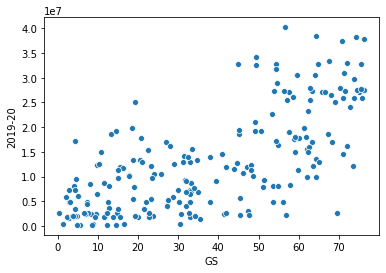

In [1344]:
sns.scatterplot(data=sixteen_to_twenty_with_sal, x='GS', y='2019-20')
#More games started, higher salary

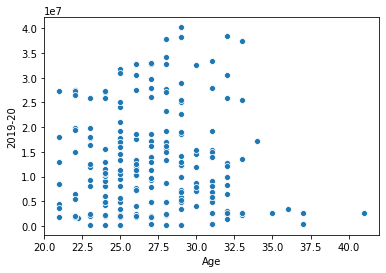

In [1345]:
sns.scatterplot(data=sixteen_to_twenty_with_sal, x='Age', y='2019-20')

In [1340]:
features = sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20', 'sal_classified'], axis=1)

In [1341]:
X = features
y = sixteen_to_twenty_with_sal['sal_classified']

In [1236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [1237]:
# def fit_models_and_score(model):
#     fitting = model.fit(X_train, y_train),
#     scores = print(model.score(X_train, y_train)), print(model.score(X_test, y_test))
    
#     return scores

In [1238]:
def fit_models_and_score(model, feature_list, target, ts):
    X = feature_list
    y = target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ts, random_state = 42)
    fitting = model.fit(X_train, y_train),
    scores = print(f'train score is {(model.score(X_train, y_train))}'), print(f'test score is {model.score(X_test, y_test)}')
    
    return scores

# Scoring models on 16-20 dataset

In [1239]:
fit_models_and_score(knnc, sixteen_to_twenty_with_sal[['Age', 'PTS', 'FGA', 'TRB', 'GS', 'FT', 'TOV', '3P', 'MP', '2P']], sixteen_to_twenty_with_sal['sal_classified'], 0.30)

train score is 0.6081081081081081
test score is 0.453125


(None, None)

In [1240]:
fit_models_and_score(logreg, sixteen_to_twenty_with_sal[['Age', 'PTS', 'FGA', 'STL', 'TOV', '2P', '3P', 'GS', 'TRB', 'MP']], sixteen_to_twenty_with_sal['sal_classified'], 0.30)

train score is 0.6081081081081081
test score is 0.609375


(None, None)

In [1241]:
fit_models_and_score(dt, sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20', 'sal_classified'], axis=1), sixteen_to_twenty_with_sal['sal_classified'], 0.30)

train score is 1.0
test score is 0.40625


(None, None)

In [1242]:
fit_models_and_score(rf, sixteen_to_twenty_with_sal.drop(['Age', 'Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1), sixteen_to_twenty_with_sal['sal_classified'], 0.30)

train score is 1.0
test score is 0.828125


(None, None)

In [1243]:
features = sixteen_to_twenty_with_sal[['Age', 'PTS', 'FGA', 'STL', 'TOV', '2P', '3P', 'GS', 'TRB', 'MP']]

In [1244]:
X = features 
y = sixteen_to_twenty_with_sal['sal_classified']

In [1245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

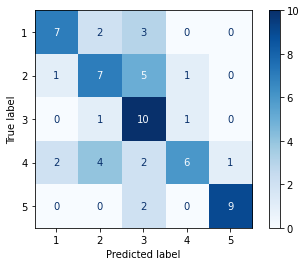

In [1246]:
plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', values_format='d');

In [1247]:
lr_grid = [
    {'penalty' : ['l2'],
      'C' : [1.0, 0.1, .05, .01],
     'solver' : ['newton-cg', 'lbfgs', 'saga']
     
        
    }
]

In [1248]:
knnc_grid = [
    {'n_neighbors': range(5, 30, 5),
    'weights': ['uniform', 'distance'],
    'p' : [1,2]}
        
    
]

In [1249]:
logreg_cv = GridSearchCV(logreg,lr_grid,cv=5)

In [1250]:
knnc_cv = GridSearchCV(knnc,knnc_grid,cv=5)

In [1251]:
fit_models_and_score(logreg_cv, sixteen_to_twenty_with_sal[['Age', 'PTS', 'FGA', 'STL', 'TOV', '2P', '3P', 'GS', 'TRB', 'MP']], sixteen_to_twenty_with_sal['sal_classified'], 0.30)
#Train lower, but test the same as before GS

train score is 0.5337837837837838
test score is 0.609375


(None, None)

In [1252]:
fit_models_and_score(knnc_cv, sixteen_to_twenty_with_sal[['Age', 'PTS', 'FGA', 'STL', 'TOV', '2P', '3P', 'GS', 'TRB', 'MP']], sixteen_to_twenty_with_sal['sal_classified'], 0.30)
#kNN model really struggling even when trying to gridsearch for hyperparamter optimization

train score is 0.5
test score is 0.46875


(None, None)

Experimenting with fewer features

In [1253]:
fit_models_and_score(logreg, sixteen_to_twenty_with_sal[['Age', 'PTS', 'MP', 'GS', 'TRB', 'TOV']], sixteen_to_twenty_with_sal['sal_classified'], 0.35)
#Experimenting with new features

train score is 0.5474452554744526
test score is 0.5733333333333334


(None, None)

# Scoring Models on 14-18 dataset

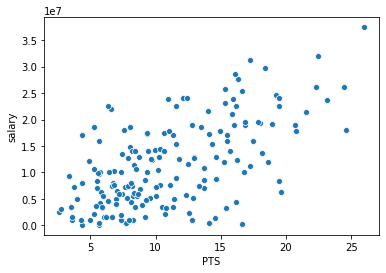

In [1346]:
sns.scatterplot(data=fourteen_to_eighteen_with_sal, x='PTS', y='salary')

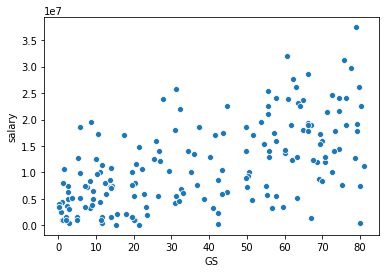

In [1347]:
sns.scatterplot(data=fourteen_to_eighteen_with_sal, x='GS', y='salary')

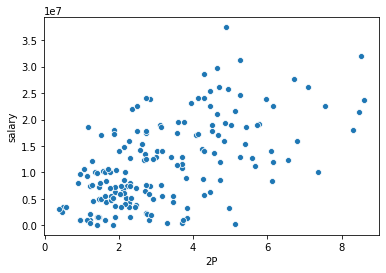

In [1349]:
sns.scatterplot(data=fourteen_to_eighteen_with_sal, x='2P', y='salary')

In [1254]:
fit_models_and_score(logreg, fourteen_to_eighteen_with_sal[['Age', 'FG', 'PTS', 'MP']], fourteen_to_eighteen_with_sal['sal_classified'], 0.30)

train score is 0.4918032786885246
test score is 0.4339622641509434


(None, None)

In [1255]:
fit_models_and_score(logreg, fourteen_to_eighteen_with_sal[['Age', 'FG', 'PTS', 'MP', 'GS', 'TRB', 'BLK']], fourteen_to_eighteen_with_sal['sal_classified'], 0.30)

train score is 0.5737704918032787
test score is 0.4528301886792453


(None, None)

In [1256]:
fit_models_and_score(logreg, fourteen_to_eighteen_with_sal[['Age', '3P%', 'FG', 'PTS', 'MP', 'GS', 'TRB', 'BLK', 'FT']], fourteen_to_eighteen_with_sal['sal_classified'], 0.30)

train score is 0.5655737704918032
test score is 0.49056603773584906


(None, None)

In [1257]:
fit_models_and_score(knnc, fourteen_to_eighteen_with_sal[['Age', 'FG', 'PTS', 'MP']], fourteen_to_eighteen_with_sal['sal_classified'], 0.30)

train score is 0.45081967213114754
test score is 0.41509433962264153


(None, None)

In [1258]:
fit_models_and_score(logreg_cv, fourteen_to_eighteen_with_sal[['Age', 'FG', 'PTS', 'MP']], fourteen_to_eighteen_with_sal['sal_classified'], 0.30)

train score is 0.48360655737704916
test score is 0.39622641509433965


(None, None)

In [1259]:
fit_models_and_score(knnc_cv, fourteen_to_eighteen_with_sal[['Age', 'FG', 'PTS', 'MP']], fourteen_to_eighteen_with_sal['sal_classified'], 0.30)

train score is 0.4918032786885246
test score is 0.3584905660377358


(None, None)

In [1260]:
features1 = fourteen_to_eighteen_with_sal[['Age', '3P%', 'FG', 'PTS', 'MP', 'GS', 'TRB', 'BLK', 'FT']]

In [1261]:
X = features1
y = fourteen_to_eighteen_with_sal['sal_classified']

In [1262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

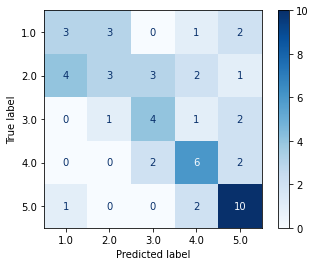

In [1263]:
plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', values_format='d');

# Scoring Models on 13-17 dataset

In [1264]:
fit_models_and_score(logreg, thirteen_to_seventeen_with_sal[['MP', 'PTS', 'FG', 'FTA', '2P', 'GS']], thirteen_to_seventeen_with_sal['sal_classified'], 0.30)

train score is 0.45185185185185184
test score is 0.4915254237288136


(None, None)

In [1265]:
fit_models_and_score(knnc, thirteen_to_seventeen_with_sal[['MP', 'PTS', 'FG', 'FTA', '2P', 'GS']], thirteen_to_seventeen_with_sal['sal_classified'], 0.30)

train score is 0.5185185185185185
test score is 0.3898305084745763


(None, None)

In [1266]:
fit_models_and_score(dt, thirteen_to_seventeen_with_sal[['MP', 'PTS', 'FG', 'FTA', '2P', 'GS']], thirteen_to_seventeen_with_sal['sal_classified'], 0.30)

train score is 1.0
test score is 0.288135593220339


(None, None)

In [1267]:
thirteen_to_seventeen_with_sal.corr()['sal_classified'].sort_values(ascending=False)

sal_classified    1.000000
salary            0.942260
MP                0.673604
FG                0.654023
PTS               0.647758
GS                0.637462
2P                0.628026
FTA               0.624318
2PA               0.609047
FT                0.607357
FGA               0.603702
DRB               0.567915
TRB               0.534853
TOV               0.500642
STL               0.430248
ORB               0.388784
PF                0.384363
G                 0.376298
BLK               0.362562
FG%               0.300108
AST               0.296975
2P%               0.233157
eFG%              0.228781
3P                0.148872
3PA               0.141375
FT%               0.034947
3P%              -0.085402
Rk               -0.088447
Age              -0.165599
Name: sal_classified, dtype: float64

In [1268]:
features2 = thirteen_to_seventeen_with_sal[['MP', 'PTS', 'FG', 'FTA', '2P', 'GS']]

In [1269]:
X = features2
y = thirteen_to_seventeen_with_sal['sal_classified']

In [1270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

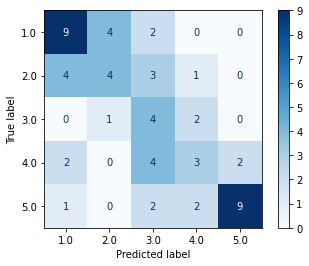

In [1271]:
plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', values_format='d');

# Experimenting w/features 16-20 

In [1272]:
sixteen_to_twenty_with_sal.corr()['2019-20'].sort_values(ascending=False)

2019-20           1.000000
sal_classified    0.941744
PTS               0.777871
FG                0.767685
FGA               0.747993
MP                0.738304
FT                0.706744
GS                0.697379
FTA               0.696733
2PA               0.684865
TOV               0.677175
2P                0.676427
AST               0.567211
STL               0.554729
DRB               0.544989
TRB               0.466665
3PA               0.428419
3P                0.423755
PF                0.376320
G                 0.323772
BLK               0.271867
FT%               0.246529
ORB               0.224346
3P%               0.157425
2P%               0.134902
eFG%              0.133224
FG%               0.128468
Rk               -0.018450
Age              -0.048687
Name: 2019-20, dtype: float64

In [1273]:
fit_models_and_score(logreg, sixteen_to_twenty_with_sal[['Age', 'PTS', 'FGA', 'STL', 'TRB', 'GS', 'TOV', 'FT', '3P', 'MP', '2P']], sixteen_to_twenty_with_sal['sal_classified'], 0.30)

train score is 0.6081081081081081
test score is 0.59375


(None, None)

# Feature Engineering

In [1274]:
features = ['G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS']
X = sixteen_to_twenty_with_sal[features]

In [1275]:
poly = PolynomialFeatures(include_bias=False)

In [1276]:
poly_features = poly.fit_transform(X)

In [1277]:
df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names(features))
df_poly

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,BLK^2,BLK TOV,BLK PF,BLK PTS,TOV^2,TOV PF,TOV PTS,PF^2,PF PTS,PTS^2
0,71.2,61.2,30.36,5.26,11.78,0.4494,1.26,3.84,0.3154,4.04,...,0.4356,0.9768,1.3596,9.2268,2.1904,3.0488,20.6904,4.2436,28.7988,195.4404
1,71.4,70.2,31.04,5.54,11.26,0.4904,1.26,3.40,0.3676,4.28,...,1.4884,1.8300,2.4156,16.4944,2.2500,2.9700,20.2800,3.9204,26.7696,182.7904
2,62.2,51.4,27.40,2.90,7.38,0.3856,1.22,3.64,0.3306,1.68,...,0.2916,0.6372,0.9828,4.5252,1.3924,2.1476,9.8884,3.3124,15.2516,70.2244
3,53.4,9.4,21.16,3.48,8.44,0.4086,1.02,2.74,0.3626,2.44,...,0.0324,0.2052,0.2880,1.8540,1.2996,1.8240,11.7420,2.5600,16.4800,106.0900
4,71.2,27.2,20.30,3.38,6.74,0.5070,0.26,0.80,0.2720,3.10,...,0.9216,1.2672,2.5344,8.5632,1.7424,3.4848,11.7744,6.9696,23.5488,79.5664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,60.8,19.0,22.40,3.10,7.78,0.3932,2.12,5.68,0.3698,0.98,...,0.0100,0.0620,0.1240,0.8960,0.3844,0.7688,5.5552,1.5376,11.1104,80.2816
208,70.0,69.6,31.32,3.96,10.00,0.3966,2.20,5.98,0.3680,1.78,...,0.0400,0.2240,0.4200,2.3320,1.2544,2.3520,13.0592,4.4100,24.4860,135.9556
209,64.8,31.2,30.18,5.16,11.84,0.4358,1.66,4.54,0.3604,3.54,...,0.2704,0.8424,1.0088,7.3216,2.6244,3.1428,22.8096,3.7636,27.3152,198.2464
210,69.8,47.6,23.18,3.98,7.36,0.5460,0.00,0.04,0.1500,3.98,...,0.7056,0.8064,1.9656,7.8960,0.9216,2.2464,9.0240,5.4756,21.9960,88.3600


In [1278]:
twenty_sal = sixteen_to_twenty_with_sal['2019-20']

In [1279]:
df_poly['salary'] = twenty_sal

In [1280]:
u = df_poly.corr()['salary'].sort_values(ascending=False)

In [1281]:
u.sort_values(ascending=False)
#Idea of some of the features most highly correlated/will work in the model

salary      1.000000
GS PTS      0.804791
MP PTS      0.799904
GS FG       0.798205
MP FG       0.797308
              ...   
2P%^2       0.122320
FG% eFG%    0.118835
eFG%^2      0.118816
FG% 2P%     0.115947
FG%^2       0.104090
Name: salary, Length: 351, dtype: float64

In [1282]:
fit_models_and_score(logreg, sixteen_to_twenty_with_sal[['Age', 'PTS', 'FGA', 'TRB', 'STL', '3P', 'GS', 'FT']], sixteen_to_twenty_with_sal['sal_classified'], 0.30)

train score is 0.581081081081081
test score is 0.578125


(None, None)

# Scoring models with Polynomial Features 

In [1283]:
my_features = ['GS PTS',  
'MP PTS',      
'GS FG',       
'MP FG',     
'GS FGA',      
'MP FGA',    
'2P% PTS',]

In [1284]:
fit_models_and_score(logreg, df_poly[['GS PTS', 'MP PTS', 'GS FG', 'FG%^2', '3P']]
# 'FG PTS'      ,
# 'FGA FG%'     ,
# 'GS FT'       ,
# 'G PTS'       ,
# 'FG eFG%'     
                                     , sixteen_to_twenty_with_sal['sal_classified'], 0.30)

train score is 0.47297297297297297
test score is 0.546875


(None, None)

I'll incorporate the new dataframe (and others from past years) to try to raise my accuracy score

# Clustering

# 16-20

In [1285]:
ss = StandardScaler()

In [1286]:
sixteen_to_twenty_with_sal = sixteen_to_twenty_with_sal.drop(['sal_classified'],axis=1)
#Dropping what we want to be our target

In [1287]:
sixteen_to_twenty_with_sal = sixteen_to_twenty_with_sal.drop(['Rk', 'Tm', 'Pos', 'Season', 'Player', '2019-20'], axis=1)
#Dropping unnecessary/non-numeric columns

In [1288]:
sixteen_to_twenty_with_sal_sc = ss.fit_transform(sixteen_to_twenty_with_sal)

In [1289]:
salary_model = KMeans(n_clusters=5, random_state=0).fit(sixteen_to_twenty_with_sal_sc)

In [1290]:
salary_model.labels_
#Predictions

array([4, 4, 4, 0, 1, 0, 3, 1, 2, 3, 0, 1, 4, 4, 0, 1, 2, 1, 0, 4, 2, 4,
       0, 0, 2, 0, 4, 0, 2, 0, 3, 1, 0, 0, 0, 1, 2, 0, 2, 4, 4, 3, 2, 0,
       0, 4, 1, 4, 2, 1, 4, 0, 4, 3, 1, 0, 1, 4, 4, 1, 2, 4, 4, 4, 0, 0,
       0, 4, 4, 3, 4, 4, 1, 4, 3, 1, 0, 4, 4, 0, 4, 0, 1, 1, 4, 4, 1, 0,
       0, 2, 1, 0, 0, 4, 1, 4, 0, 2, 1, 0, 4, 1, 3, 4, 4, 2, 3, 0, 0, 4,
       3, 3, 2, 4, 2, 4, 4, 4, 1, 2, 1, 0, 2, 1, 2, 3, 0, 0, 2, 2, 0, 4,
       0, 4, 4, 0, 4, 4, 1, 0, 1, 0, 0, 1, 2, 0, 0, 1, 4, 0, 1, 4, 3, 3,
       1, 0, 4, 4, 0, 4, 0, 0, 2, 4, 4, 0, 0, 4, 1, 4, 4, 1, 4, 1, 4, 3,
       2, 0, 4, 0, 0, 4, 0, 2, 3, 0, 4, 1, 0, 0, 0, 4, 0, 4, 0, 4, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 4, 4, 1, 2])

In [1291]:
centroids = salary_model.cluster_centers_
centroids

array([[ 0.1304003 , -0.4465121 , -0.93902095, -0.84488358, -0.80758332,
        -0.7117293 , -0.6603034 , -0.08640835, -0.09967235,  0.28974646,
        -0.87493774, -0.84725212, -0.57317049, -0.43501129, -0.69599372,
        -0.7568651 ,  0.20115015, -0.66381654, -0.7825128 , -0.78477353,
        -0.43790174, -0.53615374, -0.62428567, -0.73911376, -0.86852052,
        -0.75611308],
       [-0.1320582 , -0.144368  , -0.44412287, -0.77466223, -0.60898564,
        -0.83549789,  1.20519263, -1.14672531, -1.17997558, -1.18352798,
        -0.1682405 , -0.32073975,  1.04501412,  0.71503942, -0.43112402,
        -0.31759708, -0.99966052,  0.80802738,  0.08254908,  0.33075193,
        -0.69359431, -0.62071784,  0.57358647, -0.55278311,  0.27161851,
        -0.6973587 ],
       [-0.03633511,  0.32756614,  1.07138264,  1.33833545,  1.690311  ,
         1.79133326, -0.13186964,  1.32306476,  1.35585691,  0.45910009,
         1.31313447,  1.4306785 , -0.10989056, -0.06198608,  1.78051414,
       

In [1292]:
score = silhouette_score(sixteen_to_twenty_with_sal_sc, salary_model.labels_)
score

0.20226473717010185

In [1293]:
sixteen_to_twenty_with_sal['cluster'] = salary_model.labels_
sixteen_to_twenty_with_sal.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster
0,22.0,71.2,61.2,30.36,5.26,11.78,0.4494,1.26,3.84,0.3154,...,1.68,5.22,6.92,2.64,0.82,0.66,1.48,2.06,13.98,4
1,31.0,71.4,70.2,31.04,5.54,11.26,0.4904,1.26,3.40,0.3676,...,1.58,5.42,7.00,4.22,0.78,1.22,1.50,1.98,13.52,4
2,27.0,62.2,51.4,27.40,2.90,7.38,0.3856,1.22,3.64,0.3306,...,1.32,5.36,6.68,1.40,0.96,0.54,1.18,1.82,8.38,4
3,26.0,53.4,9.4,21.16,3.48,8.44,0.4086,1.02,2.74,0.3626,...,0.48,2.98,3.48,1.72,0.62,0.18,1.14,1.60,10.30,0
4,24.0,71.2,27.2,20.30,3.38,6.74,0.5070,0.26,0.80,0.2720,...,2.14,4.48,6.60,1.00,0.44,0.96,1.32,2.64,8.92,1


In [1315]:
cluster_df = sixteen_to_twenty_with_sal_sc

In [1318]:
# cluster_df = pd.DataFrame(cluster_df, columns=[])

# 14-18 Clusters

In [1294]:
fourteen_to_eighteen_with_sal = fourteen_to_eighteen_with_sal.drop(['sal_classified'], axis=1)

In [1295]:
fourteen_to_eighteen_with_sal = fourteen_to_eighteen_with_sal.drop(['Rk', 'Tm', 'Pos', 'Season', 'Player', 'salary'], axis=1)
#Dropping unnecessary/non-numeric columns

In [1296]:
fourteen_to_eighteen_with_sal_sc = ss.fit_transform(fourteen_to_eighteen_with_sal)

In [1297]:
salary_model = KMeans(n_clusters=5, random_state=0).fit(fourteen_to_eighteen_with_sal_sc)

In [1298]:
salary_model.labels_
#Predictions

array([0, 0, 3, 3, 4, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 3, 3, 4, 0, 3, 2, 4,
       3, 2, 0, 1, 3, 1, 2, 1, 3, 3, 1, 2, 4, 3, 1, 3, 3, 2, 3, 1, 0, 0,
       3, 0, 2, 1, 4, 3, 3, 1, 0, 1, 0, 3, 3, 1, 3, 3, 0, 2, 4, 4, 4, 1,
       1, 2, 1, 1, 3, 3, 3, 0, 1, 2, 1, 1, 3, 3, 2, 4, 1, 3, 4, 1, 2, 1,
       1, 2, 2, 3, 2, 1, 0, 1, 3, 2, 3, 2, 3, 1, 2, 0, 1, 1, 3, 3, 3, 0,
       0, 3, 3, 3, 4, 1, 1, 1, 4, 2, 3, 1, 1, 3, 2, 3, 3, 3, 3, 3, 1, 0,
       2, 0, 3, 2, 1, 1, 2, 2, 4, 2, 4, 3, 1, 0, 1, 1, 1, 1, 3, 2, 4, 4,
       3, 1, 0, 1, 2, 1, 3, 1, 2, 3, 4, 1, 4, 2, 4, 2, 1, 3, 3, 1, 0])

In [1299]:
centroids = salary_model.cluster_centers_
centroids

array([[ 1.24977037e-01,  3.78825173e-01,  1.00905259e+00,
         9.16490724e-01,  1.32081301e+00,  9.85268565e-01,
         1.10190827e+00, -9.19888612e-01, -9.31570478e-01,
        -4.52788171e-01,  1.75807579e+00,  1.59751867e+00,
         7.45976580e-01,  4.61914386e-01,  9.78263821e-01,
         1.20587022e+00, -5.30731546e-01,  1.66020929e+00,
         1.79215676e+00,  1.83263870e+00, -1.43317349e-01,
         1.87379093e-01,  1.63648749e+00,  6.26113838e-01,
         1.18421007e+00,  1.08596117e+00],
       [-6.18412740e-02, -7.12162157e-01, -1.00968246e+00,
        -1.11303879e+00, -9.46478002e-01, -8.95808695e-01,
        -5.17293536e-01, -2.84140626e-01, -2.82425726e-01,
         2.16837558e-01, -8.82280082e-01, -8.64381640e-01,
        -3.89960171e-01, -3.76463457e-01, -8.32494287e-01,
        -8.56698665e-01,  8.85255425e-02, -6.32764404e-01,
        -8.22482836e-01, -7.95738772e-01, -4.85452284e-01,
        -6.47086235e-01, -5.64005667e-01, -8.31915369e-01,
        -8.92

In [1300]:
score = silhouette_score(fourteen_to_eighteen_with_sal_sc, salary_model.labels_)
score

0.18878454929551425

In [1301]:
fourteen_to_eighteen_with_sal['cluster'] = salary_model.labels_
fourteen_to_eighteen_with_sal.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster
0,28.0,62.333333,62.333333,31.866667,7.166667,13.333333,0.536667,0.433333,1.333333,0.338,...,1.933333,5.666667,7.633333,3.000000,0.866667,1.433333,1.600000,1.833333,16.333333,0
1,30.0,61.666667,50.666667,29.633333,7.433333,15.000000,0.491667,0.000000,0.100000,0.300,...,1.600000,6.933333,8.533333,1.766667,0.733333,1.100000,1.133333,2.333333,16.800000,0
2,24.0,78.666667,50.000000,24.200000,2.833333,6.600000,0.434000,0.733333,2.200000,0.302,...,1.433333,4.200000,5.633333,1.300000,0.933333,0.633333,1.100000,1.933333,7.666667,3
3,23.0,45.333333,14.000000,29.033333,4.600000,10.866667,0.423333,0.866667,2.266667,0.379,...,0.666667,3.000000,3.666667,2.566667,0.700000,0.166667,1.800000,2.366667,13.733333,3
4,21.0,63.000000,31.000000,17.966667,2.266667,5.000000,0.451000,0.000000,0.033333,0.238,...,1.766667,3.733333,5.533333,0.600000,0.366667,0.900000,1.200000,2.533333,5.766667,4


In [1302]:
salary_model.labels_
#Predictions

array([0, 0, 3, 3, 4, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 3, 3, 4, 0, 3, 2, 4,
       3, 2, 0, 1, 3, 1, 2, 1, 3, 3, 1, 2, 4, 3, 1, 3, 3, 2, 3, 1, 0, 0,
       3, 0, 2, 1, 4, 3, 3, 1, 0, 1, 0, 3, 3, 1, 3, 3, 0, 2, 4, 4, 4, 1,
       1, 2, 1, 1, 3, 3, 3, 0, 1, 2, 1, 1, 3, 3, 2, 4, 1, 3, 4, 1, 2, 1,
       1, 2, 2, 3, 2, 1, 0, 1, 3, 2, 3, 2, 3, 1, 2, 0, 1, 1, 3, 3, 3, 0,
       0, 3, 3, 3, 4, 1, 1, 1, 4, 2, 3, 1, 1, 3, 2, 3, 3, 3, 3, 3, 1, 0,
       2, 0, 3, 2, 1, 1, 2, 2, 4, 2, 4, 3, 1, 0, 1, 1, 1, 1, 3, 2, 4, 4,
       3, 1, 0, 1, 2, 1, 3, 1, 2, 3, 4, 1, 4, 2, 4, 2, 1, 3, 3, 1, 0])

# 13-17 Clusters

In [1303]:
thirteen_to_seventeen_with_sal = thirteen_to_seventeen_with_sal.drop(['sal_classified'], axis=1)

In [1304]:
thirteen_to_seventeen_with_sal = thirteen_to_seventeen_with_sal.drop(['Rk', 'Tm', 'Pos', 'Season', 'Player', 'salary'], axis=1)

In [1305]:
thirteen_to_seventeen_with_sal_sc = ss.fit_transform(thirteen_to_seventeen_with_sal)

In [1306]:
salary_model = KMeans(n_clusters=5, random_state=0).fit(thirteen_to_seventeen_with_sal_sc)

In [1307]:
centroids = salary_model.cluster_centers_
centroids

array([[-0.22059567,  0.34610006,  0.33141302, -0.04964242, -0.15659099,
        -0.4564754 ,  1.49133799, -1.07421794, -1.14932367, -1.2107933 ,
         0.27419923,  0.09315781,  1.15024642,  0.89069857, -0.19647733,
         0.01797525, -1.06746584,  1.58544139,  0.82379951,  1.13578116,
        -0.64911708, -0.61632698,  1.38711602, -0.25850946,  0.91503129,
        -0.31685742],
       [-0.21009612,  0.3083345 ,  0.75782227,  0.99474169,  0.8192028 ,
         0.97553555, -0.35257722,  0.97477066,  1.00100574,  0.49024999,
         0.46859663,  0.57281366, -0.31179322, -0.12683207,  0.77417804,
         0.61963341,  0.6786943 , -0.47259539, -0.03431968, -0.19190698,
         1.07437699,  0.92777547, -0.40428848,  0.9403546 ,  0.08235174,
         0.9270464 ],
       [-0.1754109 , -0.83301298, -1.0518274 , -1.23511175, -0.98678655,
        -0.98330924, -0.2355607 , -0.50850637, -0.51479501, -0.08405138,
        -0.83246896, -0.84044659, -0.16852504, -0.33489539, -0.83710535,
       

In [1308]:
score = silhouette_score(thirteen_to_seventeen_with_sal_sc, salary_model.labels_)
score

0.15696316376603325

In [1309]:
thirteen_to_seventeen_with_sal['cluster'] = salary_model.labels_
thirteen_to_seventeen_with_sal.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,cluster
0,29.5,69.00,13.25,19.875,3.200,7.725,0.41900,1.175,3.100,0.376000,...,0.375,1.350,1.725,2.800,0.600,0.175,1.500,2.000,8.700,3
1,27.5,65.25,65.25,33.200,7.325,13.575,0.53825,0.325,1.025,0.378500,...,2.100,6.150,8.275,3.050,0.925,1.350,1.700,1.925,16.600,4
2,29.5,65.75,57.50,30.500,7.525,15.200,0.49225,0.000,0.125,0.239333,...,1.700,7.000,8.700,1.850,0.800,1.100,1.175,2.300,17.050,4
3,23.5,78.00,55.25,24.950,2.875,6.500,0.44425,0.575,1.725,0.279250,...,1.525,4.625,6.150,1.325,1.000,0.650,1.200,1.950,7.575,3
4,22.5,50.00,10.50,26.225,4.075,9.675,0.42250,0.775,2.050,0.374000,...,0.650,2.675,3.325,2.275,0.650,0.175,1.650,2.225,12.050,3


# Groupby salary in clusters

In [1313]:
sixteen_to_twenty_with_sal.groupby('cluster').mean()
#players in this cluster salaries

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
cluster,,,,,,,,,,,,,,,,,,,,,
0,27.553623,57.104348,15.428986,19.606957,2.674203,6.292464,0.420212,1.045797,2.889855,0.341736,...,0.778722,0.528986,2.225797,2.749855,1.724058,0.618261,0.242029,0.894493,1.556812,7.359130
1,26.621622,60.513514,26.827027,20.052973,3.065405,5.775676,0.533627,0.207027,0.655135,0.199917,...,0.678319,1.738378,3.738919,5.471892,1.250270,0.586486,0.757838,1.033514,2.175135,7.688649
2,26.961538,65.838462,61.730769,33.473846,7.594615,16.743846,0.452338,2.160769,5.900769,0.358038,...,0.827962,0.830769,4.190000,5.013846,5.509231,1.329231,0.413077,2.721538,2.209231,21.832308
3,25.375000,69.112500,63.637500,30.127500,6.476250,11.903750,0.557937,0.382500,1.155000,0.227599,...,0.684525,3.023750,7.632500,10.652500,2.336250,0.890000,1.405000,2.031250,2.807500,16.550000
4,27.343750,65.271875,49.615625,28.861563,4.768125,10.786563,0.440138,1.470000,4.075313,0.353247,...,0.784601,0.890313,3.735312,4.624063,2.995000,0.947187,0.474063,1.614375,2.181875,13.038125


In [1319]:
# sixteen_to_twenty_with_sal.groupby('cluster').

# Scoring model with clusters

In [1191]:
fit_models_and_score(logreg, sixteen_to_twenty_with_sal.drop(['Age'], axis=1), sixteen_to_twenty_with_sal['cluster'])

train score is 0.9932432432432432
test score is 0.984375


(None, None)

In [1192]:
fit_models_and_score(knnc, sixteen_to_twenty_with_sal.drop(['Age'], axis=1), sixteen_to_twenty_with_sal['cluster'])

train score is 0.831081081081081
test score is 0.75


(None, None)

In [1193]:
fit_models_and_score(logreg, sixteen_to_twenty_with_sal.drop(['Age'], axis=1), sixteen_to_twenty_with_sal['cluster'])

train score is 0.9932432432432432
test score is 0.984375


(None, None)

Clustering with other datasets

# Searching for ideal k for clustering

In [1196]:
for i in range(2,23):
    salary_model = KMeans(n_clusters=i, random_state=0).fit(sixteen_to_twenty_with_sal_sc)
    print(silhouette_score(sixteen_to_twenty_with_sal_sc, salary_model.labels_))

#Highest silhouette scores are with 2 and 3 clusters, but not significantly higher than the one we used where k=5

0.2749013616279595
0.2763159972217445
0.2046602529966292
0.20226473717010185
0.14476250378824998
0.17993114939058472
0.1498822002449758
0.13817940976955703
0.13301930259667832
0.12928553242563276
0.13068637625718071
0.12513995505074074
0.12202690714618188
0.10904883479356187
0.1275436588779501
0.12775077135866825
0.11766367843997398
0.11016313132647415
0.10269156057489424
0.11341517544896292
0.11681378863221319


In [1100]:
for i in range(2,23):
    salary_model = KMeans(n_clusters=i, random_state=0).fit(fourteen_to_eighteen_with_sal_sc)
    print(silhouette_score(fourteen_to_eighteen_with_sal_sc, salary_model.labels_))

0.2750566247781479
0.2747368535018793
0.2677210485827732
0.18878454929551425
0.1573385086252208
0.157192380823437
0.12846765824868958
0.1285746821156275
0.13725734362840153
0.1322589550983205
0.13285060151908692
0.12917584465071455
0.11928940588775942
0.12041544716921809
0.12789593755371603
0.12778482781512546
0.11906903293228305
0.11853543179686699
0.12169741165188623
0.1266692386270077
0.11210423257759462


In [1101]:
for i in range(2,23):
    salary_model = KMeans(n_clusters=i, random_state=0).fit(thirteen_to_seventeen_with_sal_sc)
    print(silhouette_score(thirteen_to_seventeen_with_sal_sc, salary_model.labels_))

0.26859459372392863
0.2688672602908561
0.23279458329146552
0.15696316376603325
0.1545205873868092
0.1451417341350024
0.1309262089134801
0.12262531736239224
0.12857185681034936
0.12641347695190133
0.12484615115770217
0.12049083926029414
0.11073435217215968
0.11726629696862194
0.10953526741861142
0.11094224915227244
0.10690791987041834
0.0989594298996313
0.11190925029562333
0.10813434947125157
0.11094877636623418


# Visualizing Clusters